# SVM: SVC & SVR

Este notebook aplica ambos enfoques de máquinas de soporte vectorial
- **Support Vector Machine** → es el concepto general.

- **SVM**: Clasificación binaria (¿Temperatura > 25°C?)
- **SVR**: Regresión continua (predicción exacta de temperatura)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("Historia_Climatica.csv")

## Clasificación con SVC

In [14]:
# Dataframe con temperatura mayor a 25grados
df["Etiqueta_TempAlta"] = (df["Temperatura_C"] > 25).astype(int)

# Eliminar columnas no útiles o temporales
X_clf = df.drop(columns=["Fecha_Hora", "Temperatura_C", "Etiqueta_TempAlta"])

# Convertir variables categóricas
X_clf = pd.get_dummies(X_clf, drop_first=True).apply(pd.to_numeric, errors='coerce').fillna(0)
y_clf = df["Etiqueta_TempAlta"]

# Separar datos en entrenamiento y prueba
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)
scaler_c = StandardScaler()
X_train_c = scaler_c.fit_transform(X_train_c)
X_test_c = scaler_c.transform(X_test_c)

# Modelo SVC
modelo_clf = SVC(kernel='rbf', C=1.0, gamma='scale')
modelo_clf.fit(X_train_c, y_train_c)
y_pred_c = modelo_clf.predict(X_test_c)

print(" Clasificación (Temperatura > 25°C):")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test_c, y_pred_c))

print("\nReporte de Clasificación:\n",classification_report(y_test_c, y_pred_c, zero_division=0))

 Clasificación (Temperatura > 25°C):
Accuracy: 0.7475247524752475

Matriz de Confusión:
 [[  0  51]
 [  0 151]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.75      1.00      0.86       151

    accuracy                           0.75       202
   macro avg       0.37      0.50      0.43       202
weighted avg       0.56      0.75      0.64       202



## Regresión con SVR

In [15]:
# Eliminar columnas no útiles o temporales
X_reg = df.drop(columns=["Fecha_Hora", "Temperatura_C", "Etiqueta_TempAlta"])

# Convertir variables categóricas
X_reg = pd.get_dummies(X_reg, drop_first=True).apply(pd.to_numeric, errors='coerce').fillna(0)
y_reg = df["Temperatura_C"]

# Separar datos en entrenamiento y prueba
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_r = scaler_X.fit_transform(X_train_r)
X_test_r = scaler_X.transform(X_test_r)
y_train_r_scaled = scaler_y.fit_transform(y_train_r.values.reshape(-1, 1)).ravel()

# Modelo SVC
modelo_svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
modelo_svr.fit(X_train_r, y_train_r_scaled)
y_pred_r_scaled = modelo_svr.predict(X_test_r)
y_pred_r = scaler_y.inverse_transform(y_pred_r_scaled.reshape(-1, 1)).ravel()

y_test_real = scaler_y.inverse_transform(y_test_r.values.reshape(-1, 1)).ravel()

print(" Regresión de Temperatura:")
print("MSE:", mean_squared_error(y_test_real, y_pred_r))
print("R²:", r2_score(y_test_real, y_pred_r))


 Regresión de Temperatura:
MSE: 893279349.4206539
R²: -1.0893529059872207


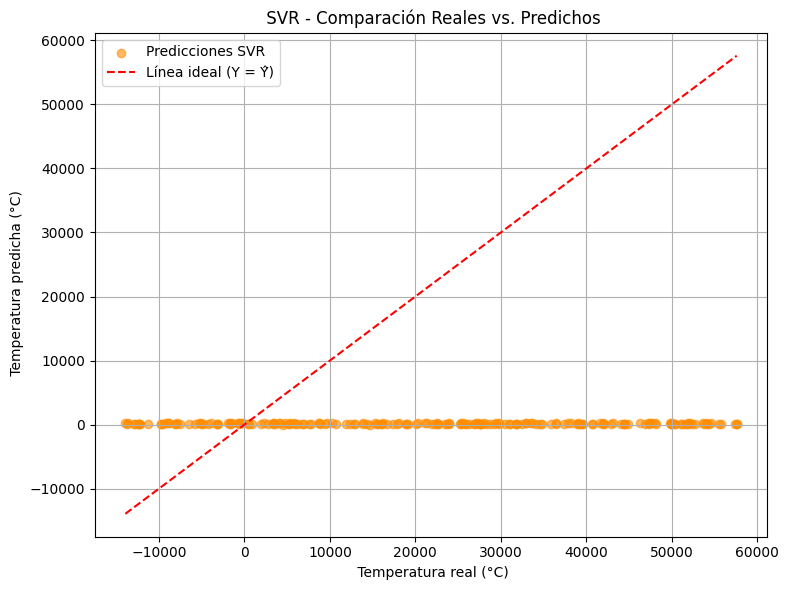

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_real, y_pred_r, color='darkorange', alpha=0.6, label="Predicciones SVR")
plt.plot([y_test_real.min(), y_test_real.max()],[y_test_real.min(), y_test_real.max()],'r--', label="Línea ideal (Y = Ŷ)")
plt.xlabel(" Temperatura real (°C)")
plt.ylabel(" Temperatura predicha (°C)")
plt.title(" SVR - Comparación Reales vs. Predichos")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()